<a href="https://colab.research.google.com/github/pschorey/Valpo_IT533/blob/main/IT_533_STEM_Module3_MeasuresOfAssociation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module 3: Measures of Association**

As we have already seen, evaluating the relationship between variables is at the heart of data mining. We have a number of techniques at our disposal:
1. Distance calculations like Euclidian, Manhattan, Cosine Similarity (and some others)
2. Measures of Independence like Chi Square, Covariance, and Correlation
3. Predictive Measures like Regression and ANOVA

In this module, you will learn how to:
* Explain distance between data in terms of Euclidian, Manhattan, Chi Square, Correlation, and Cosine Similarity
* Set up Cosine Similarity calculations
* Set up Chi Square calculations
* Set up Correlation calculations

#**0. Preparation and Setup**
We are working with our adult dataset again, so we're loading our libraries and our dataset just like last time. Since we are working with more involved math this time around, we will need more functionality:
* **Scikit-Learn**: We will use the cosine_similarity function from the [scikit-learn metrics module](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). If you click that link, you'll see that this is the big math module--knowing which functions to use will allow you to skip programming much of the math by hand. Very practical! Cosine similarity is located in the [pairwise submodule](https://scikit-learn.org/stable/modules/metrics.html#metrics).
* **Scipy**: This is numpy's ["big sister" for advanced math](https://docs.scipy.org/doc/scipy-1.6.3/reference/). We will use it for Chi Square calculations.
* **Math**: The [math package](https://docs.python.org/3/library/math.html) allows us to do advanced math, calculate logarithmic functions etc.

In [13]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math
from math import acos, degrees
from scipy import spatial
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from sklearn.metrics.pairwise import cosine_similarity

from IPython.display import HTML # This is just for me so I can embed videos

#Reading in the data as adult dataframe
adult = pd.read_csv("https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/adult.data.simplified.csv")

#Verifying that we can see the data
adult.head()

,age,workclass,education,educationyears,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,incomeUSD
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,43747
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,38907
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,25055
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,26733
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,23429


#**1. Distance**

Let's say you want to buy a car. You probably know what you're looking for already: You know the color, the make, and the model year you want, and the budget you have available. What you don't know just yet is, of course, the exact price--that's why you're shopping around. 

Let's say you are looking for a red 2020 Mercedes for less than $5,000. 

<center><img src = 'https://www.carpro.com/hubfs/car-review-blog/review_337244_1.jpg' width = 500></center>

Here are your shopping notes:

* **Dealer 1:** Red 2012 Audi $4,500

* **Dealer 2:** Silver 2008 Mercedes $8,000

* **Dealer 3:** Red 2020 Chevrolet $4,999

Which car are you going to buy?

If you were going to use Distance (i.e. **difference**) and a simple boolean algorithm to match these criteria, here is what this would look like:

* **Color**: Dealers 1 and 3 have red cars, so they get a 0 for red; Dealer 2 gets a 1 because their car is silver.

* **Year**: Dealers 1 and 2 get a 1 because their cars are older; only Dealer 3 gets a 0 because their car is from 2020.

* **Make**: Dealers 1 and 3 get a 1 because you were not looking for an Audi or a Chevrolet; you were looking for a Mercedes, which you found at Dealer 2 (who gets a 0).

* **Price**: Dealer 2 is too expensive (1); only Dealers 1 and 3 match your criteria (both get a 0). 

Now we total up the points: Dealer 1 gets 2 points (Year and Make are different); Dealer 2 gets 3 points (Color, Year, and Price are different); Dealer 3 gets 1 point (only the Make is different)--so, the red 2020 Chevy for $4,999 from Dealer 3 is **CLOSEST**to what you were looking for. For all the others, the Distance from your original search is bigger. 

This example is obviously a gross simplification, but it illustrates one thing: **The closer two data points, or even two data series, are--that is, the more they are alike--the smaller the distance between the two.** 
<hr>

###**TRIGONOMETRY MOMENT!**

There are three major mathematical ways to measure distance in a two-dimensional plane, and they are all based on (yay?) **RIGHT TRIANGLES**: Euclidean, Manhattan, and Cosine Similarity:

<img src = 'https://i0.wp.com/dataaspirant.com/wp-content/uploads/2015/04/cover_post_final.png'>

##**1.1 Euclidean Distance**#
The Euclidean distance between two points measures the length of a segment connecting the two points. It is the most obvious way of representing distance between two points--the **HYPOTENUSE** (line d) in the triangle below:

<img src="https://raw.githubusercontent.com/shstreuber/Data-Mining/master/images/Euclidean_distance.png" width=200 height=200>

As you can see, in this graphic, the Pythagorean theorem leads us to calculate side d like this:

            ** √((x2−x1)^2+(y2−y1)^2)`**

##And how does this work in Python?##
It's not that hard to compute the Euclidean distance with straight-up Python math, as long as you take your time and go stepwise. Pandas and numpy help us with that. 

It's ok to skip ahead to the section with the adult dataset, if you are out of time.

###**1.1.1 Euclidean distance using straight-forward math**##
We will set up a quick dummy dataset and do the math as the second step.

In [ ]:
# Here, I am creating a quick dummy dataset. You won't need to do this with the adult dataset
# or with any data series that is already formatted as a series.

# We build two series called x and y
x = pd.Series([1, 2, 3, 4, 5])
y = pd.Series([6, 7, 8, 9, 10])

# Let's check what x and y contain:
print("Series 1:")
print(x)
  
print("Series 2:")
print(y)

Series 1:
0    1
1    2
2    3
3    4
4    5
dtype: int64
Series 2:
0     6
1     7
2     8
3     9
4    10
dtype: int64


Alright. The dataset is in place and correctly formatted. Now we start setting up the Euclidean distance formula. 

In [ ]:
# First, we square each datapoint as a in series x and save the array into p1
# Then, we square each datapoint as b in series y and save the array into p2
p1 = np.sum([(a * a) for a in x])
p2 = np.sum([(b * b) for b in y])

# Now we can build the formula with the squared values
# The numpy zip() function makes it easy to iterate through x and y
dist = np.sqrt(np.sum([(a-b)*(a-b) for a, b in zip(x, y)])) 

# So, what's the distance?:
print("Euclidean distance between our two series is:", dist)

Euclidean distance between our two series is: 11.180339887498949


The entire operation took 3 lines of code. That was ... fun? Maybe? Is there an easier way?

###**1.1.2 Euclidean distance using dot product**##
Now let's do this math differently, not with pandas, but with numpy. For this, we will need our data to look like an **array** and not like a series. **Arrays are one of the most common ways to work with data in Python.**

In [ ]:
# First, we build our data again, but this time as arrays, This will allow us to do simple vector math!

point1 = np.array((1, 2, 3, 4, 5))
point2 = np.array((6, 7, 8, 9, 10))
  
# Let's check what x and y contain:
print("Array 1:")
print(point1)
  
print("Array 2:")
print(point2)

Array 1:
[1 2 3 4 5]
Array 2:
[ 6  7  8  9 10]


In [ ]:
# Now we subtract point 2 from point 1.
temp = point1 - point2
  
# Then we use the dot product to find the sum of squares
sum_sq = np.dot(temp.T, temp)
  
# All we need now is to tae the spare root of the sum of squares
print("Euclidean distance between our two arrays is:",np.sqrt(sum_sq))

Euclidean distance between our two arrays is: 11.180339887498949


###**1.1.3 Euclidean Distance and the adult dataset**##
Now let's try this on the adult dataset.

Our question to ask: Does incomeUSD depend more on a person's age or on their educationyears? In other words, we want to find out which of these two attributes is closer to incomeUSD.

**First, age**:

In [ ]:
point1 = np.array((adult.age))
point2 = np.array((adult.incomeUSD))
  
 # Let's check what x and y contain:
print("Array 1:")
print(point1)
  
print("Array 2:")
print(point2)

Array 1:
[39 50 38 ... 58 22 52]
Array 2:
[ 43747  38907  25055 ...  46073  29618 196782]


In [ ]:
dist = np.linalg.norm(point1 - point2)
  
# printing Euclidean distance
print("Euclidean distance between age and incomeUSD is:", dist)

Euclidean distance between age and incomeUSD is: 12969807.476741742


###**Your Turn**
In the space below, do the same transformation (that's a data-sciency way to say "ensure your data is in (here) array format>") and calculation, but for the educationyears attribute in comparison to incomeUSD.

First, transform the data into array format:

In [ ]:
edYears = np.array(adult['educationyears'])
inUSD = np.array(adult['incomeUSD'])

array([ 43747,  38907,  25055, ...,  46073,  29618, 196782])

Second, use linalg or dot product (just for fun) to calculate the Euclidean distance:

In [ ]:
#linalg
linalgDist = np.linalg.norm(edYears - inUSD)
print("education years to income USD dist is: ", linalgDist)

#dot product
temp = edYears - inUSD  
sum_sq = np.dot(temp.T, temp)
print("Euclidean distance between our two arrays is:",np.sqrt(sum_sq))

education years to income USD dist is:  12974071.632952549
Euclidean distance between our two arrays is: 12974071.632952549


Third, use your good judgment and compare the Euclidean distance I have calculated comparing age and incomeUSD with the Euclidean distance you have calculated comparing educationyears and incomeUSD. **A smaller distance number shows you that the two attributes are more closely related. A larger distance number shows you that they are not as closely related.**

**Now you can answer our question**: Which distance is smaller? In other words, what attribute determines a person's incomeUSD more--age or educationyears? Type your answer in the text box below:

Education age has a closer distance than education years does to income.

##**1.2. Manhattan Distance**#
The Manhattan distance, also often called rectilinear or city block distance, between two points is measured along axes at right angles. In a plane with p1 at (x1, y1) and p2 at (x2, y2), it is 

            **|x1 - x2| + |y1 - y2|**

In the graphic below, the measurement goes at an angle through the lower right-hand point across from the hypotenuse:

<img src="https://raw.githubusercontent.com/shstreuber/Data-Mining/master/images/Euclidean_distance.png" width=200 height=200>

###**1.2.1 Math? Not again, please!**
Ok, ok, I get it: If you wanted to calculate things with complicated formulas, you would have taken a Math class and not a class in which we should be using easy programming methods. Fine, then. BUT we'll need a different Python library to accomplish "no math": 

**The [SciPy library](https://www.scipy.org/) does all the math for us.**

In [ ]:
import scipy.spatial.distance as dist

Now, we set up our data. You already know this from section 1.1 above.

In [ ]:
point1 = np.array((1, 2, 3, 4, 5))
point2 = np.array((6, 7, 8, 9, 10))

print ('Here is our sample data')
print ('------------------------')
print ("Array 1:", point1)
print ("Array 2:", point2)

Here is our sample data
------------------------
Array 1: [1 2 3 4 5]
Array 2: [ 6  7  8  9 10]


Time to program our algorithm!

In [ ]:
print ("Manhattan Distance:", f'{dist.cityblock(point1,point2):,}')

Manhattan Distance: 1,842,100,150


**Wait, WHAT?** That was quick! Can we do that with Euclidean Distance, too?

In [ ]:
print ("Euclidean Distance:", f'{dist.euclidean(point1,point2):,}')

Euclidean Distance: 12,974,071.632952549


One line! No math! So short! So elegant! And, of course, different from our Euclidean measurement because we're not measuring the direct connection, but we're going around the "cityblocks" to get from our first to our second point.

***We have reached the goal!***


###**1.2.2 Manhattan Distance and the adult dataset**
Let's take the show on the road again, with our adult dataset. To show you the entire process, we'll walk through the array conversion step first and then display the Manhattan Distance.

I'm again working with the age and incomeUSD attributes. Your job is to compute the educationyears and incomeUSD attributes.

In [ ]:
point1 = np.array((adult.age))
point2 = np.array((adult.incomeUSD))

print ("Manhattan Distance between age and incomeUSD:", f'{dist.cityblock(point1,point2):,}')

Manhattan Distance between age and incomeUSD: 1,841,172,130


###**Your Turn**
Now, do the same thing I did above with age and incomeUSD, but with educationyears and incomeUSD. You'll need to set up your arrays and then use the print function to display the Manhattan distance.

In [ ]:
point1 = np.array((adult.educationyears))
point2 = np.array((adult.incomeUSD))
print ("Manhattan Distance between education years and incomeUSD:", f'{dist.cityblock(point1,point2):,}')

Manhattan Distance between education years and incomeUSD: 1,842,100,150


Compare your results about educationyears and incomeUSD to my results about age and incomeUSD. Which attribute is close to incomeUSD--age or educationyears? Type your answer below:

Using Manhattan Distance, age is closer than education years.

## **1.3. Cosine Similarity**

Cosine Similarity is the last distance-based measure that we haven't discussed yet. 

While Euclidean and Manhattan Distance are just plain calculations, Cosine Similarity works with angles. This is where things get a little more involved. 

Mathematically speaking, **Cosine Similarity** is the normalized dot product between two vectors, i.e. two attributes in our dataframe. The steps are
* Calculate the dot product between two attributes (or, in math language: Calculate the product of the Euclidean magnitudes of these two vectors). If you're not sure what dot product is, [here is a great explanation](https://www.mathsisfun.com/algebra/vectors-dot-product.html).
* Calculate the cosine of the angle between these two vectors.
Quick helper: The cosine of 0° is 1 (meaning the two vectors are identical), and it is less than 1 for any other angle. It is 0 for a 90° angle.

<img src = 'https://i0.wp.com/dataaspirant.com/wp-content/uploads/2015/04/cosine.png'>

Since Cosine Similarity can be computed relatively quickly, it is very popular.

More information is here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html

### **1.3.1 A Small Example**
Here is how this works on a very small example, with two made-up vectors.
Note that all the vectors **MUST be numeric**! (One big reason why we  covered preprocessing techniques in the previous module).

In [ ]:
# Here are the two vectors again. Think of them like numeric attributes from your dataframe:
a = np.array([1,2,3])
b = np.array([1,1,4])

print(a,b)

[1 2 3] [1 1 4]


First, we do this manually with the dot product you already know:

In [ ]:
# We can MANUALLY compute cosine similarity (this is where we are using the math library we called above)
dot = np.dot(a, b)  # computing the dot product with the dot function
norma = np.linalg.norm(a)  # normalizing vector a to bring it on the same scale as vector b
normb = np.linalg.norm(b)  # normalizing vector b o bring it on the same scale as vector a
cos1 = dot / (norma * normb)  # computing the cosine by dividing the dot product by the normalized vectors as shown in the cartoon above

print('dot', dot) #simple matrix multiplication a * b = [1, 2, 3] * [1, 1, 4] = 1 * 1 + 2 * 1 + 3 * 4 
print('norma', norma) #sqrt of the sum of squares,  1^2 + 2^2 + 3^2 
print('normb', normb)
print('cos1', cos1) 

dot 15
norma 3.7416573867739413
normb 4.242640687119285
cos1 0.9449111825230682


In [ ]:
# Now we need to find the angle from the cosine. This requires two steps: 
# 1. convert the angle to radians
# 2. calculate the degrees

angle_in_radians1 = math.acos(cos1)
degrees1 = math.degrees(angle_in_radians1)

print(cos1, angle_in_radians1, degrees1)

0.9449111825230682 0.3334731722518318 19.106605350869078


So, that was straight-up programmed math. 

But this is **DATA MINING**, and we have fancy packages like sklearn.metrics to speed things up. So, we'll do this over again:

In [ ]:
# Using the COSINE_SIMILARITY FUNCTION from sklearn.metrics
cos2 = cosine_similarity(a,b)

ValueError: ignored

**Wait, what?** Let's **read the error message** here: It tells us that something is wrong with the way our input data is formatted. In fact, the cosine_similarity function expects two-dimensional arrays. Our input data has just one each. That's why we need to reformat (=reshape) out input data. Let's try this again:

In [ ]:
# Using the COSINE_SIMILARITY FUNCTION from sklearn.metrics
aa = a.reshape(1,3) # we have 1 row, 3 columns in our array
print('aa (now a 2d array)',aa)
ba = b.reshape(1,3) # we have 3 values in our array
cos3 = cosine_similarity(aa, ba)

# Now we need to convert the angle to radians to get the degrees
angle_in_radians3 = math.acos(cos3)
degrees3 = math.degrees(angle_in_radians3)
 
print(cos3, angle_in_radians3, degrees3)

aa (now a 2d array) [[1 2 3]]
[[0.94491118]] 0.3334731722518315 19.10660535086906


As you can see, both, the manual calculation and the calculation with  scikit-learn get us identical results. On to bigger and better things!

###**1.3.2 Cosine Similarity with the adult Dataset**
Now we are going to apply what we have learned above to the adult dataset. Remember that the inputs MUST be numeric!

In [ ]:
# First, we convert two attributes to numpy arrays
a = np.array(adult.educationyears)
b = np.array(adult.incomeUSD)

# Manually computing cosine similarity
dot = np.dot(a, b)  # the dot product
norma = np.linalg.norm(a)  # normalizing vector a
normb = np.linalg.norm(b)  # normalizing vector b
cos4 = dot / (norma * normb)  # computing the angle by dividing the dot product by the normalized vectors

print(cos4)

0.8066671273202539


### Your Turn
1. Compute the angle in degrees from the cos4 value shown above. Use the code field below.

In [ ]:
angle_in_radians4 = math.acos(cos4)
degrees4 = math.degrees(angle_in_radians4)
 
print(cos4, angle_in_radians4, degrees4)

0.8066671273202539 0.6323054348402 36.228432779527736


2. Now, use sklearn.metrics to compute the angle between adult.educationyears and adult.incomeUSD.

Remember to reshape the input data. Each vector has 32561 values.

In [ ]:
a = np.array(adult.educationyears)
b = np.array(adult.incomeUSD)
aa = a.reshape(1,32561)
bb = b.reshape(1,32561)
cos5 = cosine_similarity(aa, bb)
angle_in_radians5 = math.acos(cos5)
degrees5 = math.degrees(angle_in_radians5)
print(cos5, angle_in_radians5, degrees5)

[[0.80666713]] 0.6323054348402 36.228432779527736


In [ ]:
# Here is a solution that uses the spatial package from scipy

a = np.array(adult.educationyears)
b = np.array(adult.incomeUSD)

result = 1 - spatial.distance.cosine(a, b)

# Now we need to convert the angle to radians to get the degrees
angle_in_radians = math.acos(result)
degrees = math.degrees(angle_in_radians)

print(result, degrees)

0.8066671273202538 36.22843277952774


#**2. Chi Square**
We just learned that Cosine Similarity explains the relationship between numerical attributes or vectors. But what about the other BIG data type--categorical data? That is where Chi Square comes in.

**Chi Square calculates the relationship between Observed and Expected Values between two CATEGORICAL attributes like in this picture:**

<img src = 'https://i.stack.imgur.com/pe4qu.png'>

To understand how Chi Square works, let's review **hypothesis testing** right quick: You may remember that all hypothesis testing starts by setting up an H0 (null hypothesis) and an Ha (alternative hypothesis). The null hypothesis states whether you assume that the two variables to compare are either dependent or independent (or equal, depending on the math that follows). Then, we use complicated math that results in a **p-value**. If this **p-value is > 0.05 (5%), then your H0 is most likely true; if it is < 0.05 (5%), then your H0 is potentially wrong and Ha is more likely true.**

Click [this link](https://www.mathsisfun.com/data/chi-square-test.html) to see a great explanation.

**THINGS TO REMEMBER** about a Chi Square test:
1. Is a hypothesis test based on categorical attributes.
2. Uses as its H0 that the two variables under investigation are independent
3. Uses a chi square table
3. If the resulting p-value is > 0.05, both variables are independent
4. If the resulting p-value is < 0.05, both variables are dependent

Soooo ... ever wondered whether there was a connection between the color of a character's uniform and their survival rate on Star Trek's U.S.S. Enterprise? Wonder no more, but [check out the Chi Square calculation right here](https://statisticsbyjim.com/hypothesis-testing/chi-square-test-independence-example/).

<center><img src = 'https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2017/03/red_shirt_meme.jpg'></center>


**In terms of programming**, the most convenient, way is [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html). chi2_contingency automatically computes the expected values from the chi square table, so you don't have to. The entire output can be captured in 4 variables: **chi square number, p-value, degrees of freedom and the array itself.** chi2_contingency works with n-dimensional contingency tables. This is what we need!

In [9]:
# Note that pd.crosstab establishes the two-way table
# We can even use a print command to format the output:
chi2, p, dof, expected = chi2_contingency((pd.crosstab(adult.nativecountry, adult.occupation).values))
print (f'Chi-square Statistic: {chi2} ,p-value: {p}, Degrees of Freedom: {dof}') #expected: {expected}

Chi-square Statistic: 2437.2965238719535 ,p-value: 3.056006193732551e-227, Degrees of Freedom: 574


###Your Turn

Calculate the Chi Square relationship between sex and occupation in the adult dataset. Is occupational status dependent on, or independent from, sex?

In [11]:
chi2, p, dof, expected = chi2_contingency((pd.crosstab(adult.sex, adult.occupation).values))
print (f'Chi-square Statistic: {chi2} ,p-value: {p}, Degrees of Freedom: {dof}')
#according to these results occupation is dependent on gender, the variables are related / bound to some degree

Chi-square Statistic: 5863.7547861768935 ,p-value: 0.0, Degrees of Freedom: 14


# **3. Covariance and Correlation**
Covariance is, essentially, the little brother of correlation. The goal for both calculations/ algorithms (about time we used that term, isn't it?) is to determine if two variables are tightly enough connected that we can detect a pattern to their changes. In other words, we want to see if, when one variable changes, the other variable changes as well, in a predictable fashion. 

More about Correlation and Covariance in the video below


In [ ]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/mwZbt11azGo" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

##**3.1 Covariance**
Covariance indicates the relationship of two variables whenever one variable changes. If an **increase** in one variable results in an **increase** in the other variable, both variables are said to have a positive covariance (the same is two if both variables decrease), which show up as a positive number. If an increase in one variable causes a decrease in the other, that is a negative covariance, i.e. an inverse relationships, which is indicated by a negative number.

Since covariance uses only numeric attributes, we can get np.cov() to work easily with educationyears and incomeUSD. For that purpose, we will use np.cov(). 

Note that, by default np.cov calculates the **SAMPLE** covariance. To get the **POPULATION** covariance, I had to set the Degrees of Freedom to 0. Or, as shown below, you can set bias to True. If you omit bias, you will calculate the SAMPLE variance.

In [14]:
# SAMPLE covariance assumes that degrees of freedom, i.e. ddof=1
#sample n-1
np.cov([adult.educationyears],[adult.incomeUSD])[0][1]

33078.30227761132

In [15]:
# POPULATION covariance can be calculated by setting ddof=0
#pop n by setting ddof=0
np.cov([adult.educationyears],[adult.incomeUSD], ddof=0)[0][1]

33077.28639043717

In [18]:
# POPULATION covariance with bias=True setting
#pop n because bias=True (omitted turns it into a sample)
np.cov([adult.educationyears],[adult.incomeUSD], bias=True)[0][1]

33077.28639043717

In [17]:
# SAMPLE covariance omitting bias=True setting
#no bias, and no ddof=0 returns to sample, ie n-1
np.cov([adult.educationyears],[adult.incomeUSD])[0][1]

33078.30227761132

So, what do all these numbers mean? 

Take the last one here: If the years of education increase by 1, the income in USD increases by $33,078. As you can see, the bias setting does not make much of a difference with smaller numbers. With larger numbers, that is a very different ballgame.

## Your Turn
Now, calculate the covariance between age and incomeUSD for the POPULATION (remember the bias setting!). Use the code line below.

In [19]:
np.cov([adult.age], [adult.incomeUSD], bias=True)[0][1]


# 3.1 Covariance between age and incomeUSD for the POPULATION (remember the bias setting!).
#age_income_cov = np.cov([adult.age],[adult.incomeUSD])[0][1]
#print("The covariance between age and incomeUSD is:", age_income_cov)
#print("This means that if age increases by 1, the income increases by $", age_income_cov)

119956.87628729304

In [20]:
np.cov([adult.age], [adult.incomeUSD], ddof=0)[0][1]

119956.87628729304

## **3.2 Correlation**

As with Chi Square and Covariance, there are numerous ways to calculate the Pearson Correlation Coefficient. The most efficient and elegant way to do this is using the corr() function in pandas. This function can also handle multiple correlations and will, in fact, produce a table with the R-squared values. NOTE that all inputs must be numeric!

If correlation (i.e. the Pearson Correlation Coefficient) is between -1 and 0, then the attributes are negatively correlated (as one grows, another one falls). If correlation is between 0 and +1, then the attributes are positively correlated (both move in the same direction). The correlation coefficient is typically called r.

Check out the graphic below to see what the different values of r look like.

<img src = 'https://media.nagwa.com/359143010784/en/thumbnail_l.jpeg'>

Now on to our task!

In [21]:
# We first want to see if educationyears and incomeUSD are correlated. So, we pass both arrays into the function:
corr_edUSD = adult['educationyears'].corr(adult['incomeUSD'])
corr_edUSD

0.2897451914344839

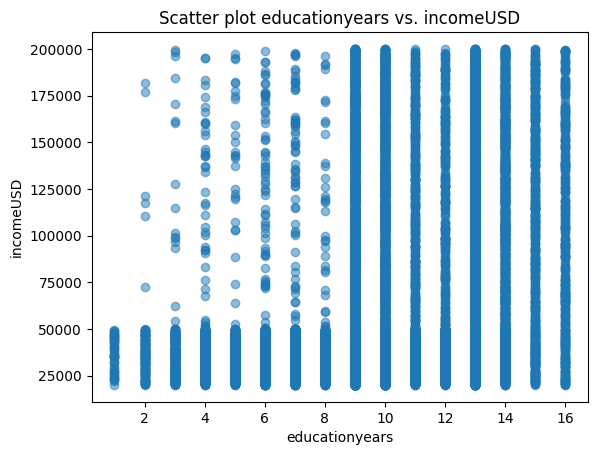

In [22]:
# We can now plot this with pyplot
plt.scatter(adult['educationyears'], adult['incomeUSD'], alpha=0.5)
plt.title('Scatter plot educationyears vs. incomeUSD')
plt.xlabel('educationyears')
plt.ylabel('incomeUSD')
plt.show()

In [23]:
# The power of the corr() function lies in its ability to handle multiple dimensions at the same time:
corr = adult.corr()
corr

<ipython-input-23-e825b078d3c0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = adult.corr()


,age,educationyears,hoursperweek,incomeUSD
age,1.000000,0.036527,0.068756,0.198187
educationyears,0.036527,1.000000,0.148123,0.289745
hoursperweek,0.068756,0.148123,1.000000,0.201811
incomeUSD,0.198187,0.289745,0.201811,1.000000


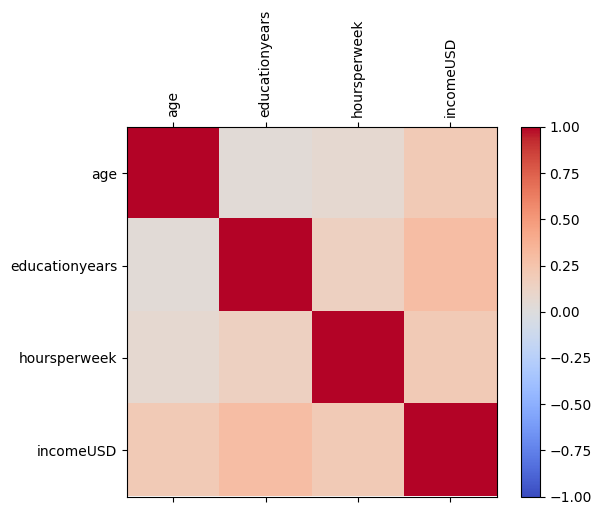

In [24]:
# Now we can make a pretty correlation heatmap with pyplot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.show()

In the examples above, we see the most frequently used Pearson Correlation in action. The corr() function allows us to work with other kinds of correlations, as well, including the Spearman correlation. 
For some great examples, take a look at this website: https://www.datascience.com/learn-data-science/fundamentals/introduction-to-correlation-python-data-science

##Your Turn
Now, calculate the following:
1. The COVARIANCE between hoursperweek and incomeUSD

In [25]:
np.cov([adult.hoursperweek], [adult.incomeUSD], bias=True)[0][1]

110571.17210910573

2. The CORRELATION between hoursperweek and incomeUSD

In [26]:
corr_hours_inc = adult['hoursperweek'].corr(adult['incomeUSD'])
corr_hours_inc

0.20181076535133524

Can you explain how the two numbers are related?

#**4. Solutions**

Below are the solutions to the Your Turn exercises.

In [ ]:
# 1.1 Euclidean Distance

point3 = np.array((adult.educationyears))
point4 = np.array((adult.incomeUSD))

# Using linalg
dist1 = np.linalg.norm(point3 - point4)

# Using dot product
temp = point3 - point4
sum_sq1 = np.dot(temp.T, temp)

# Printing Euclidean distance
print("(LINALG CALCULATION) Euclidean distance between educationyears and incomeUSD is:", dist1)
print("(DOT PRODUCT) Euclidean distance between our two arrays is:",np.sqrt(sum_sq1))
print("Previously calculated Euclidean distance between age and incomeUSD was:", dist)

(LINALG CALCULATION) Euclidean distance between educationyears and incomeUSD is: 12974071.632952549
(DOT PRODUCT) Euclidean distance between our two arrays is: 12974071.632952549
Previously calculated Euclidean distance between age and incomeUSD was: 11.180339887498949


In [ ]:
# 1.2 Manhattan Distance

point5 = np.array((adult.educationyears))
point6 = np.array((adult.incomeUSD))

print("Manhattan Distance between educationyears and incomeUSD:", dist.cityblock(point5,point6))
print("Previously calculated Manhattan distance between age and incomeUSD was:", dist.cityblock(point1,point2))

Manhattan Distance between educationyears and incomeUSD: 1842100150
Previously calculated Manhattan distance between age and incomeUSD was: 1841172130


In [ ]:
# 1.3 Cosine Similarity between educationyears and incomeUSD

# METHOD 1: Final computation for the dot product part
angle_in_radians4 = math.acos(cos4)
degrees4 = math.degrees(angle_in_radians4)
 
print("Dot Product Computation Result:", cos4, angle_in_radians4, degrees4)

# METHOD 2: Using the COSINE_SIMILARITY FUNCTION from sklearn.metrics

x = np.array((adult.educationyears))
y = np.array((adult.incomeUSD))

xx = x.reshape(1,32561) # we have 32561 values in our array
yy = y.reshape(1,32561) # we have 32561 values in our array
cos6 = cosine_similarity(xx, yy)

# Now we need to convert the angle to radians to get the degrees
angle_in_radians6 = math.acos(cos6)
degrees6 = math.degrees(angle_in_radians6)
 
print("sklearn.metrics Result:", cos6, angle_in_radians6, degrees6)

Dot Product Computation Result: 0.8066671273202539 0.6323054348402 36.228432779527736
sklearn.metrics Result: [[0.80666713]] 0.6323054348402 36.228432779527736


In [12]:
# 2. Chi Square relationship between sex and occupation in the adult dataset. Is occupational status dependent on, or independent from, sex?

chi2, p, dof, expected = chi2_contingency((pd.crosstab(adult.sex, adult.occupation).values))
print (f'Chi-square Statistic: {chi2} ,p-value: {p}, Degrees of Freedom: {dof}')
print ("Look for the p value--if it is < 0.05, we cannot assume that the two variables are independent from each other; they must be dependent.")

Chi-square Statistic: 5863.7547861768935 ,p-value: 0.0, Degrees of Freedom: 14
Look for the p value--if it is < 0.05, we cannot assume that the two variables are independent from each other; they must be dependent.


The covariance between age and incomeUSD is: 119960.56046654019
This means that if age increases by 1, the income increases by $ 119960.56046654019
The covariance between age and incomeUSD is: 110574.56802962505
This means that if hoursperweek increases by 1, the income increases by $ 110574.56802962505
The correlation between hoursperweek and incomeUSD is: 0.20181076535133524


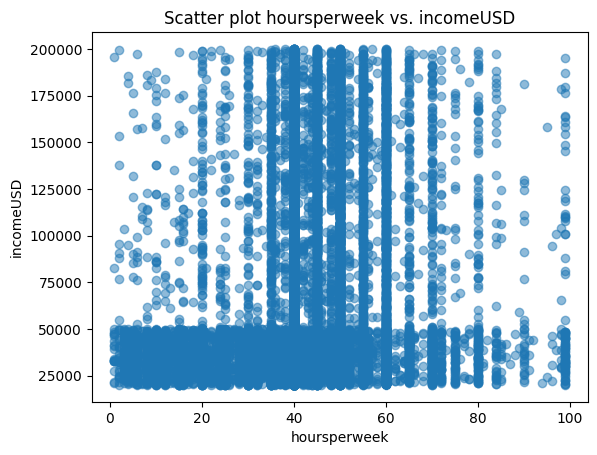

In [28]:
# 3.1 Covariance between age and incomeUSD for the POPULATION (remember the bias setting!).
####I BELIEVE THERE IS AN ERROR IN THIS ANSWER, GIVEN THE DIRECTIONS CONTRADICT IT####
age_income_cov = np.cov([adult.age],[adult.incomeUSD])[0][1]
print("The covariance between age and incomeUSD is:", age_income_cov)
print("This means that if age increases by 1, the income increases by $", age_income_cov)

# 3.2 Correlation 

# COVARIANCE between hoursperweek and incomeUSD
hrs_income_cov = np.cov([adult.hoursperweek],[adult.incomeUSD])[0][1]
print("The covariance between age and incomeUSD is:", hrs_income_cov)
print("This means that if hoursperweek increases by 1, the income increases by $", hrs_income_cov)

# CORRELATION between hoursperweek and incomeUSD
corr_hrsUSD = adult['hoursperweek'].corr(adult['incomeUSD'])
print("The correlation between hoursperweek and incomeUSD is:", corr_hrsUSD)

plt.scatter(adult['hoursperweek'], adult['incomeUSD'], alpha=0.5)
plt.title('Scatter plot hoursperweek vs. incomeUSD')
plt.xlabel('hoursperweek')
plt.ylabel('incomeUSD')
plt.show()